In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
import re
from math import sqrt
import string
import json
import os

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import snscrape.modules.twitter as sntwitter

from datetime import datetime
from datetime import date, timedelta

In [2]:
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, f1_score

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Conv2D, MaxPooling2D ,MaxPooling1D, Flatten, Bidirectional
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

seed=42

In [4]:
import torch
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor

In [5]:
df = pd.read_csv('BTC-USD_data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
0,2022-03-01,43194.503906,44793.601562,42952.585938,44354.636719,44354.636719,32479047645,-0.097561,-4,41
1,2022-03-02,44357.617188,45077.578125,43432.851562,43924.117188,43924.117188,29183112630,-0.225000,-9,40
2,2022-03-03,43925.195312,44021.578125,41914.750000,42451.789062,42451.789062,24967782593,-0.146341,-6,41
3,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427,-0.175000,-7,40
4,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450,-0.184211,-7,38
5,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902,-0.125000,-5,40
6,2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503,-0.230769,-9,39
7,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476,-0.073171,-3,41
8,2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034,-0.097561,-4,41
9,2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,39437.460938,31078064711,-0.150000,-6,40


In [6]:
df.shape

(426, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       426 non-null    datetime64[ns]
 1   Open       426 non-null    float64       
 2   High       426 non-null    float64       
 3   Low        426 non-null    float64       
 4   Close      426 non-null    float64       
 5   Adj Close  426 non-null    float64       
 6   Volume     426 non-null    int64         
 7   P_mean     426 non-null    float64       
 8   P_sum      426 non-null    int64         
 9   twt_count  426 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 33.4 KB


In [8]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
count,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02,426.000000,426.000000,426.00000
mean,25386.515602,25866.840229,24867.243228,25354.240335,25354.240335,2.856650e+10,-0.143708,-5.751174,40.00939
std,8118.962151,8275.076792,7925.745544,8075.911402,8075.911402,1.235633e+10,0.106658,4.276234,1.17219
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09,-0.463415,-19.000000,34.00000
25%,19583.862305,20114.195801,19238.673340,19583.991699,19583.991699,2.034292e+10,-0.210526,-8.000000,40.00000
50%,22692.206055,23149.954102,22306.991211,22695.765625,22695.765625,2.717070e+10,-0.146341,-6.000000,40.00000
75%,29234.101562,29915.810059,28707.443848,29236.551270,29236.551270,3.330188e+10,-0.073171,-3.000000,41.00000
max,47456.898438,48086.835938,47100.437500,47465.730469,47465.730469,1.189925e+11,0.125000,5.000000,41.00000


In [9]:
df['sentiment_analysis']=df['P_mean']
df['sentiment_analysis'] = df['sentiment_analysis'].apply(lambda x: 'pos' if x > 0 else 'nue' if x == 0 else 'neg')

sentiment_counts = df['sentiment_analysis'].value_counts()
sentiment_counts

neg    382
pos     29
nue     15
Name: sentiment_analysis, dtype: int64

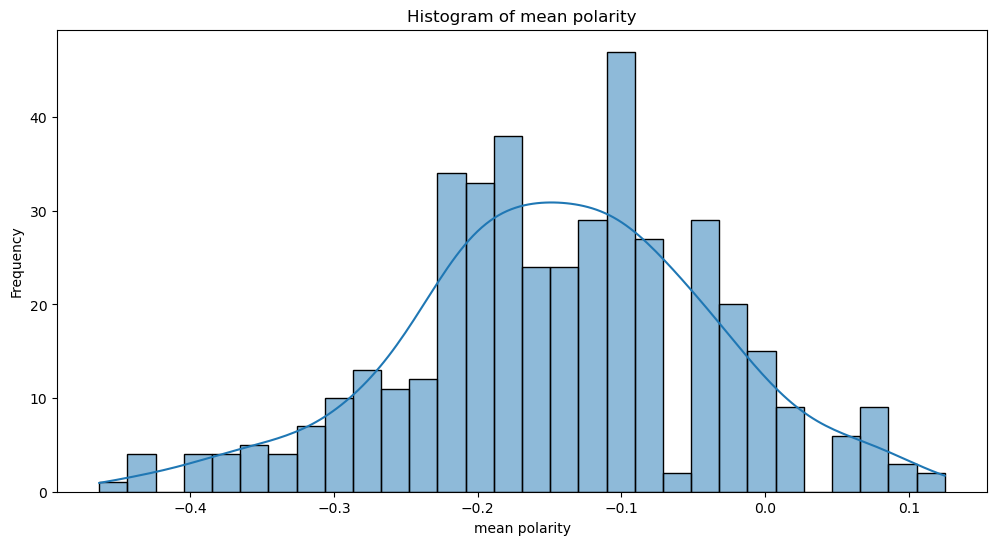

In [10]:
stock_data = df

plt.figure(figsize=(12, 6))
sns.histplot(stock_data['P_mean'], bins=30, kde=True, edgecolor='black')
plt.title('Histogram of mean polarity')
plt.xlabel('mean polarity')
plt.ylabel('Frequency')
plt.show()

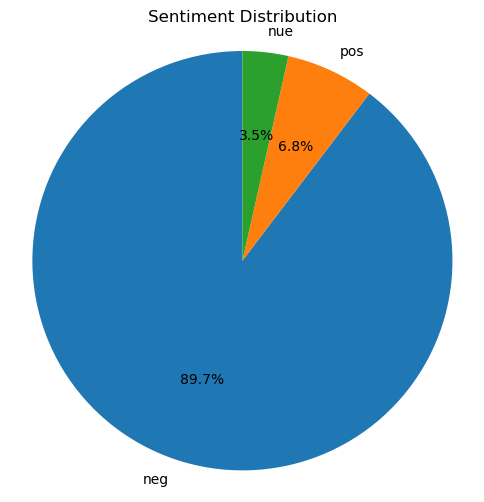

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

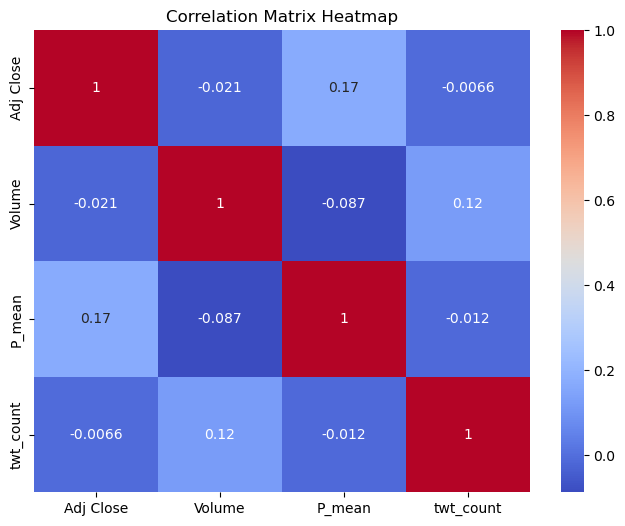

In [12]:
# Plotting the correlation matrix heatmap
correlation_matrix = stock_data[['Adj Close', 'Volume', 'P_mean', 'twt_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

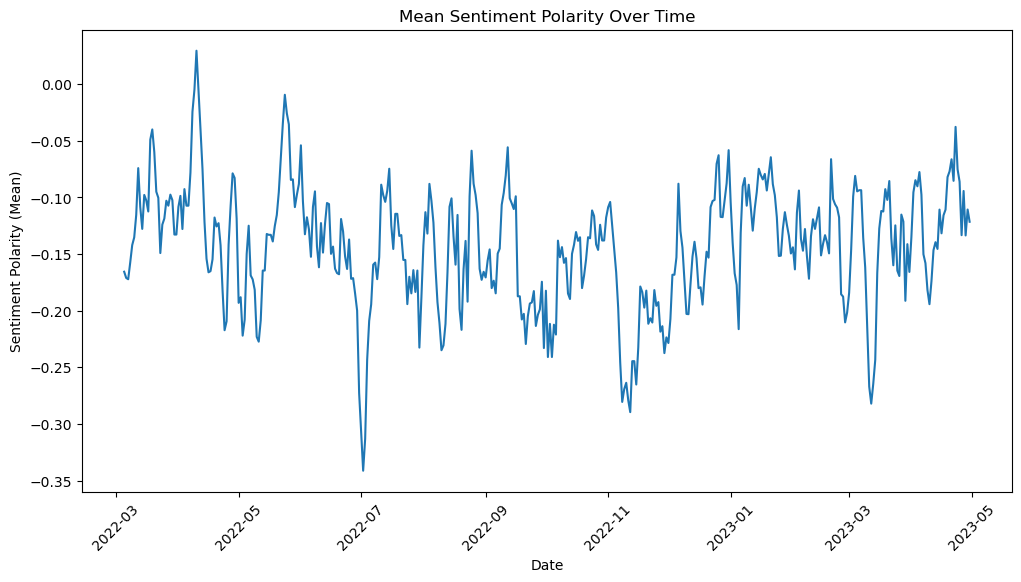

In [13]:
plt.figure(figsize=(12, 6))
rolling_mean = stock_data['P_mean'].rolling(window=5).mean()
plt.plot(stock_data['date'], rolling_mean)
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity (Mean)')
plt.title('Mean Sentiment Polarity Over Time')
plt.xticks(rotation=45)
plt.show()

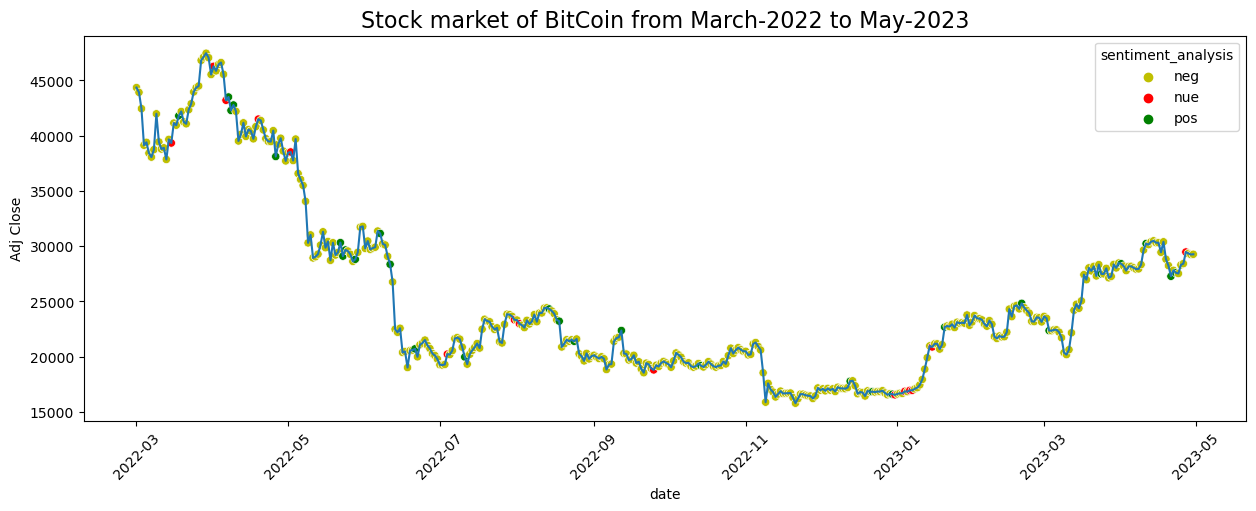

In [14]:
plt.figure(figsize=(15,5));
sns.lineplot(x = df["date"], y = df["Adj Close"])

sns.scatterplot(x=df["date"],y=df['Adj Close'],hue=df['sentiment_analysis'],palette=['y','r','g'])
plt.xticks(rotation=45);
plt.title("Stock market of BitCoin from March-2022 to May-2023",fontsize=16);

In [15]:
df.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count,sentiment_analysis
0,2022-03-01,43194.503906,44793.601562,42952.585938,44354.636719,44354.636719,32479047645,-0.097561,-4,41,neg
1,2022-03-02,44357.617188,45077.578125,43432.851562,43924.117188,43924.117188,29183112630,-0.225000,-9,40,neg
2,2022-03-03,43925.195312,44021.578125,41914.750000,42451.789062,42451.789062,24967782593,-0.146341,-6,41,neg
3,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427,-0.175000,-7,40,neg
4,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450,-0.184211,-7,38,neg
5,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902,-0.125000,-5,40,neg
6,2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503,-0.230769,-9,39,neg
7,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476,-0.073171,-3,41,neg
8,2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034,-0.097561,-4,41,neg
9,2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,39437.460938,31078064711,-0.150000,-6,40,neg


In [16]:
train_dates = pd.to_datetime(df['date'])

cols = ['Open',
    'High', 
    'Low',
    'Close',
    'Volume',
    'Adj Close',
    'P_mean']

training_df = df[cols].astype(float)
training_df.index = df['date']
training_df

,Open,High,Low,Close,Volume,Adj Close,P_mean
date,,,,,,,
2022-03-01,43194.503906,44793.601562,42952.585938,44354.636719,3.247905e+10,44354.636719,-0.097561
2022-03-02,44357.617188,45077.578125,43432.851562,43924.117188,2.918311e+10,43924.117188,-0.225000
2022-03-03,43925.195312,44021.578125,41914.750000,42451.789062,2.496778e+10,42451.789062,-0.146341
2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,2.851627e+10,39137.605469,-0.175000
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,1.697592e+10,39400.585938,-0.184211
...,...,...,...,...,...,...,...
2023-04-26,28300.058594,29995.837891,27324.548828,28422.701172,3.185424e+10,28422.701172,-0.210526
2023-04-27,28428.464844,29871.546875,28402.886719,29473.787109,2.715345e+10,29473.787109,0.000000
2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719,1.754446e+10,29340.261719,-0.108108


In [17]:
scaler = MinMaxScaler()
scaler = scaler.fit(training_df)
scaled_train = scaler.transform(training_df)

inference_scaler = MinMaxScaler()
inference_scaler.fit_transform(training_df.loc[:,['Open','Adj Close']])

scaled_train

array([[0.86543177, 0.89654909, 0.86832799, ..., 0.22254487, 0.90179147,
        0.62176166],
       [0.90215247, 0.90546969, 0.88357384, ..., 0.19292586, 0.88820117,
        0.40518135],
       [0.88850046, 0.87229739, 0.83538227, ..., 0.15504468, 0.84172389,
        0.5388601 ],
       ...,
       [0.43248262, 0.41841527, 0.42317378, ..., 0.08833484, 0.42782962,
        0.603837  ],
       [0.42792227, 0.41463514, 0.42820319, ..., 0.02649109, 0.42493259,
        0.52610602],
       [0.4250477 , 0.43032835, 0.42902787, ..., 0.06234342, 0.42557398,
        0.55790506]])

In [18]:
train_input = []
train_target = []

n_future = 1  
n_past = 5  

for i in range(n_past, len(scaled_train) - n_future +1):
    train_input.append(scaled_train[i - n_past:i, 0:training_df.shape[1]])
    train_target.append(scaled_train[i + n_future - 1:i + n_future,[0,-2]])

train_input, train_target = np.array(train_input), np.array(train_target)

print('train_input shape = {}.'.format(train_input.shape))
print('train_target shape = {}.'.format(train_target.shape))

train_input shape = (421, 5, 7).
train_target shape = (421, 1, 2).


### TabNet Regressor

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(336, 5, 7)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(302, 5, 7)

In [21]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_train.shape
y_train = y_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples,nx*ny))

In [22]:
reg_model = TabNetRegressor(n_d = 6, n_a = 6, n_steps = 5, gamma = 1.5, 
                       n_independent = 2, n_shared = 2, 
                       optimizer_fn = torch.optim.Adam, optimizer_params = dict(lr=1e-2, weight_decay = 1e-5),
                       scheduler_params = dict(mode = "min", patience = 5, min_lr = 2e-5, factor = 0.9), scheduler_fn = torch.optim.lr_scheduler.ReduceLROnPlateau,
                       mask_type = "entmax")

In [23]:
reg_model.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        eval_name=['train', 'valid'],
        eval_metric=['rmse'],
        max_epochs = 200,
        patience = 40,
        batch_size = 64, virtual_batch_size = 128,
        num_workers=0,
        drop_last=False)

epoch 0  | loss: 2.94453 | train_rmse: 0.56779 | valid_rmse: 0.24335 |  0:00:00s
epoch 1  | loss: 1.6644  | train_rmse: 0.34929 | valid_rmse: 0.21591 |  0:00:01s
epoch 2  | loss: 1.00368 | train_rmse: 0.28424 | valid_rmse: 0.19381 |  0:00:01s
epoch 3  | loss: 0.52404 | train_rmse: 0.29602 | valid_rmse: 0.18362 |  0:00:02s
epoch 4  | loss: 0.28676 | train_rmse: 0.30806 | valid_rmse: 0.1935  |  0:00:03s
epoch 5  | loss: 0.19829 | train_rmse: 0.31418 | valid_rmse: 0.19449 |  0:00:03s
epoch 6  | loss: 0.15808 | train_rmse: 0.31662 | valid_rmse: 0.21699 |  0:00:04s
epoch 7  | loss: 0.1236  | train_rmse: 0.32897 | valid_rmse: 0.22259 |  0:00:04s
epoch 8  | loss: 0.09338 | train_rmse: 0.31287 | valid_rmse: 0.21662 |  0:00:05s
epoch 9  | loss: 0.07521 | train_rmse: 0.3017  | valid_rmse: 0.21479 |  0:00:06s
epoch 10 | loss: 0.07103 | train_rmse: 0.24118 | valid_rmse: 0.17612 |  0:00:06s
epoch 11 | loss: 0.07032 | train_rmse: 0.19355 | valid_rmse: 0.16107 |  0:00:07s
epoch 12 | loss: 0.06379 | t

epoch 102| loss: 0.00359 | train_rmse: 0.04572 | valid_rmse: 0.04304 |  0:00:57s
epoch 103| loss: 0.00429 | train_rmse: 0.0424  | valid_rmse: 0.04165 |  0:00:57s
epoch 104| loss: 0.00412 | train_rmse: 0.04198 | valid_rmse: 0.04132 |  0:00:58s
epoch 105| loss: 0.00364 | train_rmse: 0.04143 | valid_rmse: 0.04187 |  0:00:58s
epoch 106| loss: 0.00477 | train_rmse: 0.04862 | valid_rmse: 0.04237 |  0:00:59s
epoch 107| loss: 0.00315 | train_rmse: 0.04051 | valid_rmse: 0.03864 |  0:00:59s
epoch 108| loss: 0.00464 | train_rmse: 0.04556 | valid_rmse: 0.0409  |  0:01:00s
epoch 109| loss: 0.00373 | train_rmse: 0.0457  | valid_rmse: 0.04423 |  0:01:01s
epoch 110| loss: 0.00346 | train_rmse: 0.04251 | valid_rmse: 0.04376 |  0:01:01s
epoch 111| loss: 0.00346 | train_rmse: 0.04711 | valid_rmse: 0.04386 |  0:01:02s
epoch 112| loss: 0.0049  | train_rmse: 0.04859 | valid_rmse: 0.04354 |  0:01:02s
epoch 113| loss: 0.00485 | train_rmse: 0.05358 | valid_rmse: 0.0459  |  0:01:03s
epoch 114| loss: 0.00412 | t

In [24]:
y_pred = reg_model.predict(X_test)
y_test_pred = inference_scaler.inverse_transform(y_pred)
y_test = inference_scaler.inverse_transform(y_test)

print("For open price: ")
mae = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

print("\n\nFor Adj Close price: ")
mae = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

For open price: 
MAE on testing data for TabNet: 666.0054
MAPE on testing data for TabNet: 0.0250


For Adj Close price: 
MAE on testing data for TabNet: 898.6327
MAPE on testing data for TabNet: 0.0339


Prediction for open price

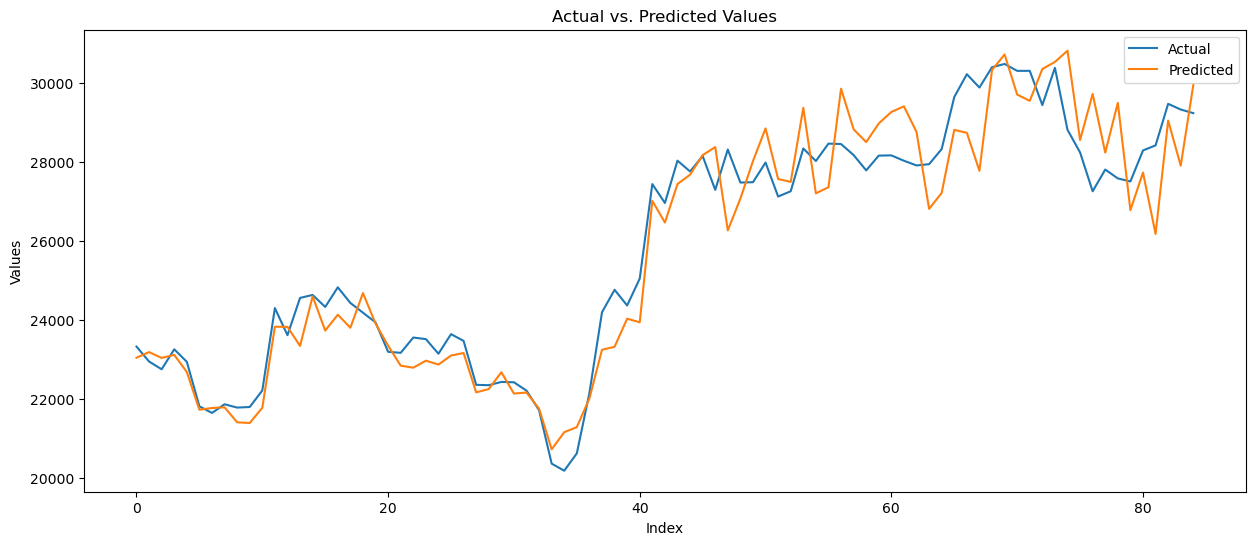

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_test_pred[:, 0], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Prediction for adjusted close price

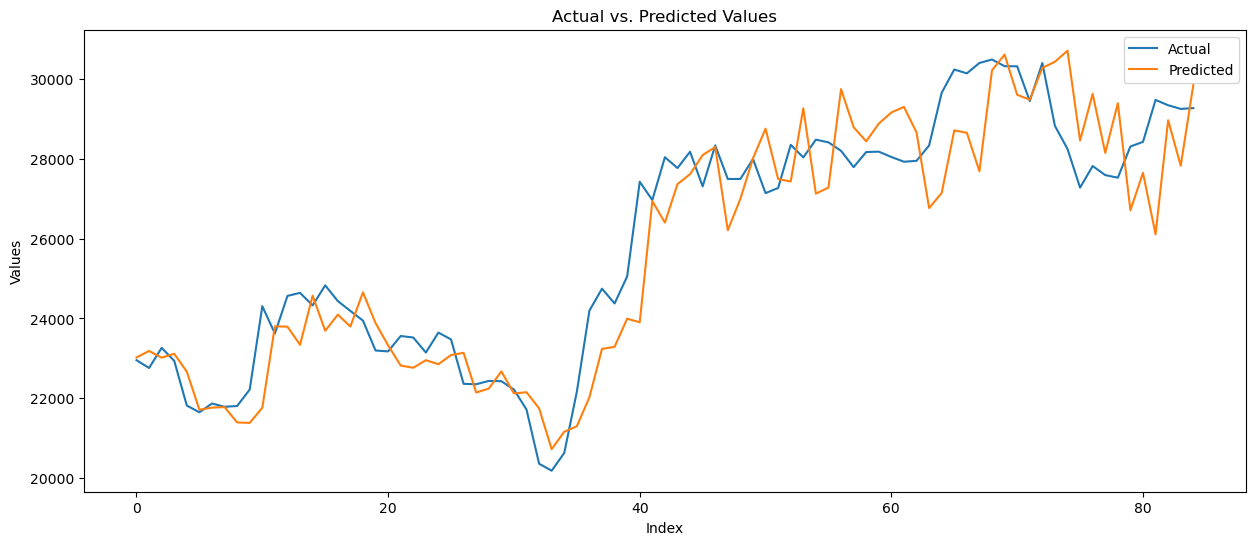

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(y_test_pred[:, 1], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Random Forest Regressor

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(336, 5, 7)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(302, 5, 7)

In [29]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_train.shape
y_train = y_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples,nx*ny))

In [30]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = regressor.predict(X_test)
y_test_pred = inference_scaler.inverse_transform(y_pred)
y_test = inference_scaler.inverse_transform(y_test)

print("For open price: ")
mae = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

print("\n\nFor Adj Close price: ")
mae = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

For open price: 
MAE on testing data for TabNet: 595.5629
MAPE on testing data for TabNet: 0.0218


For Adj Close price: 
MAE on testing data for TabNet: 1550.3466
MAPE on testing data for TabNet: 0.0573


Prediction for open price

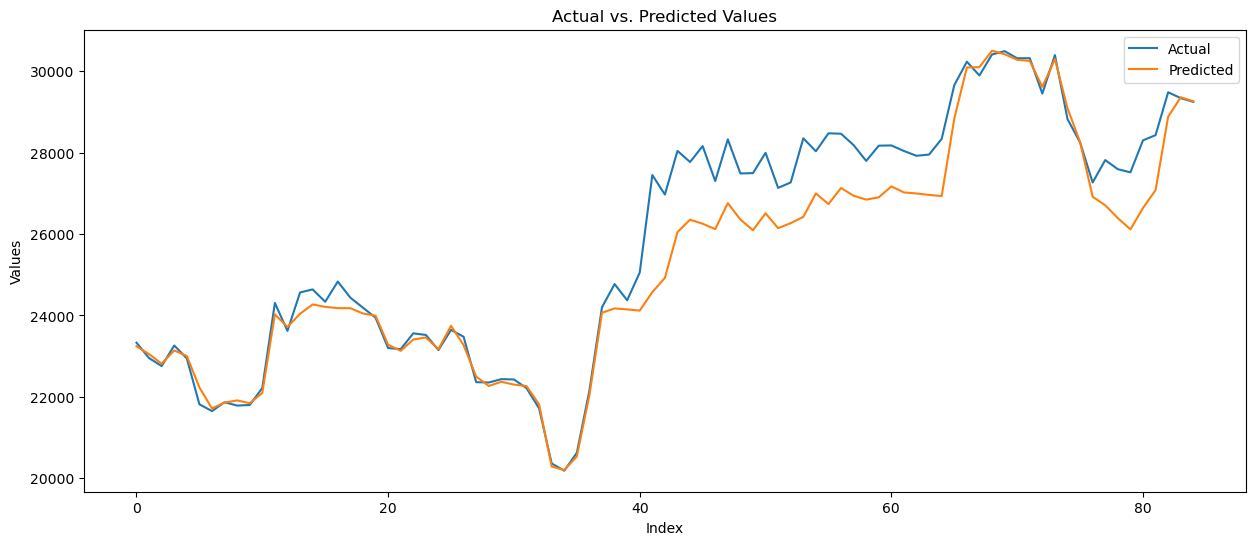

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_test_pred[:, 0], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Prediction for adjusted close price

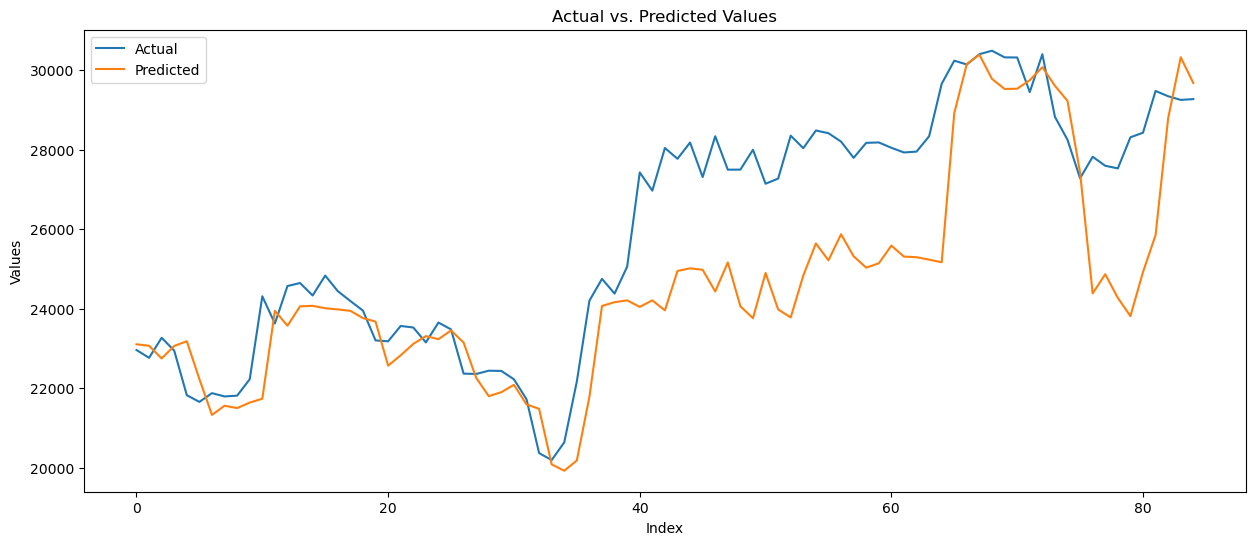

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(y_test_pred[:, 1], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### CNN - LSTM neural network model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(336, 5, 7)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(302, 5, 7)

In [36]:
def model_architecture(input_shape):
    
    tf.random.set_seed(seed)
    
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='valid', input_shape=input_shape))
    cnn_lstm_model.add(MaxPooling1D(pool_size=2, strides=2))
    cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='valid'))
    cnn_lstm_model.add(MaxPooling1D(pool_size=1, strides=2))
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.add(Dense(32, activation='relu'))
    cnn_lstm_model.add(Dense(train_target.shape[2], activation='relu'))
    
    cnn_lstm_model.compile(optimizer='adam', loss='mse')
    cnn_lstm_model.summary()
    
    return cnn_lstm_model

In [37]:
cnn_lstm_model = model_architecture((X_train.shape[1],X_train.shape[2]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 128)            1920      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 1, 512)           657408    
 l)                                                              
                                                        

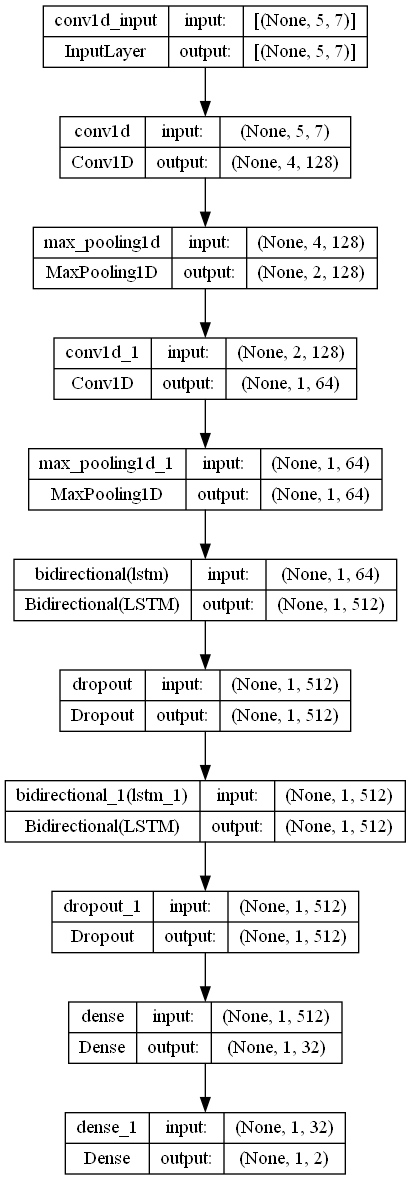

In [38]:
from keras.utils import plot_model
plot_model(cnn_lstm_model, to_file='cnn_lstm_model.png', show_shapes=True, show_layer_names=True)

In [39]:
history = cnn_lstm_model.fit(X_train, y_train, 
                             epochs=70, 
                             batch_size=64, 
                             validation_data=(X_val, y_val), 
                             verbose=1)

Epoch 1/70
5/5 [==============================] - 17s 899ms/step - loss: 0.1329 - val_loss: 0.0316
Epoch 2/70
5/5 [==============================] - 0s 66ms/step - loss: 0.1005 - val_loss: 0.0159
Epoch 3/70
5/5 [==============================] - 0s 67ms/step - loss: 0.0949 - val_loss: 0.0152
Epoch 4/70
5/5 [==============================] - 0s 80ms/step - loss: 0.0912 - val_loss: 0.0161
Epoch 5/70
5/5 [==============================] - 0s 65ms/step - loss: 0.0905 - val_loss: 0.0161
Epoch 6/70
5/5 [==============================] - 0s 66ms/step - loss: 0.0897 - val_loss: 0.0152
Epoch 7/70
5/5 [==============================] - 0s 66ms/step - loss: 0.0892 - val_loss: 0.0151
Epoch 8/70
5/5 [==============================] - 0s 65ms/step - loss: 0.0883 - val_loss: 0.0098
Epoch 9/70
5/5 [==============================] - 0s 66ms/step - loss: 0.0520 - val_loss: 9.3860e-04
Epoch 10/70
5/5 [==============================] - 0s 63ms/step - loss: 0.0067 - val_loss: 0.0036
Epoch 11/70
5/5 [======

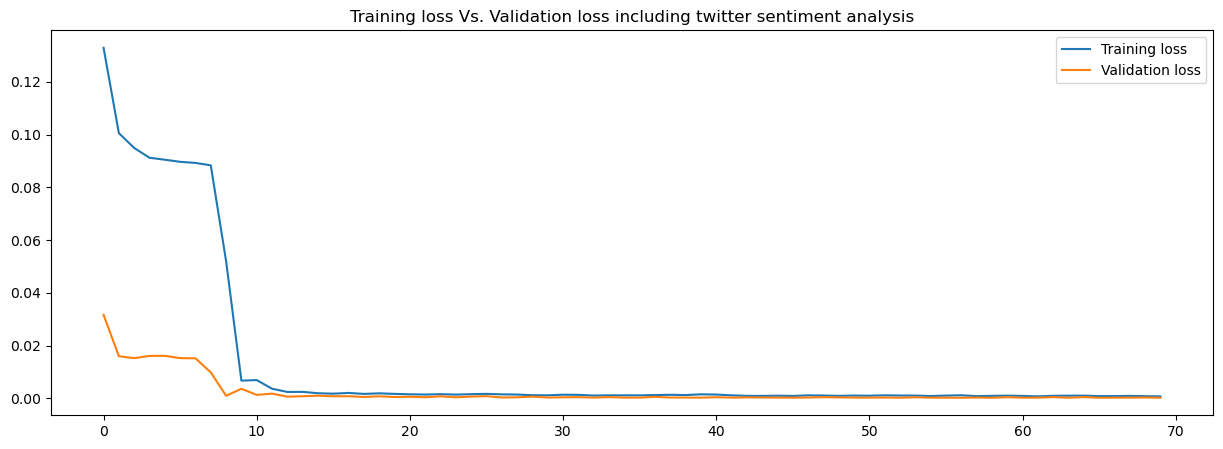

In [40]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss including twitter sentiment analysis')
plt.legend()

In [41]:
def prediction_plot(type, dates, y_actual, y_pred_lstm):
    predicted_features=['Open','Adj Close']
    for i,predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15,6))

        plt.title(f'LSTM {type} prediction of {predicted_feature} feature with twitter sentiment analysis')
        
        sns.lineplot(x=dates, y=y_actual[:,i],label='Actual')
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')
        plt.show()
        
        mae = mean_absolute_error(y_actual[:,i], y_pred_lstm[:, i])
        print(f'MAE for {predicted_feature} : {mae}\n\n')
        
        mape = mean_absolute_percentage_error(y_actual[:,i], y_pred_lstm[:, i])
        print(f'MAPE for {predicted_feature} : {mape}\n\n')

In [42]:
training_dates= training_df.index[:X_train.shape[0]]


training_prediction = cnn_lstm_model.predict(X_train)
training_prediction=training_prediction.reshape(training_prediction.shape[0], training_prediction.shape[2])
y_train_pred = inference_scaler.inverse_transform(training_prediction)

y_train_reshaped = y_train.reshape(y_train.shape[0], y_train.shape[2])

y_train_actual = inference_scaler.inverse_transform(y_train_reshaped)

10/10 [==============================] - 2s 11ms/step


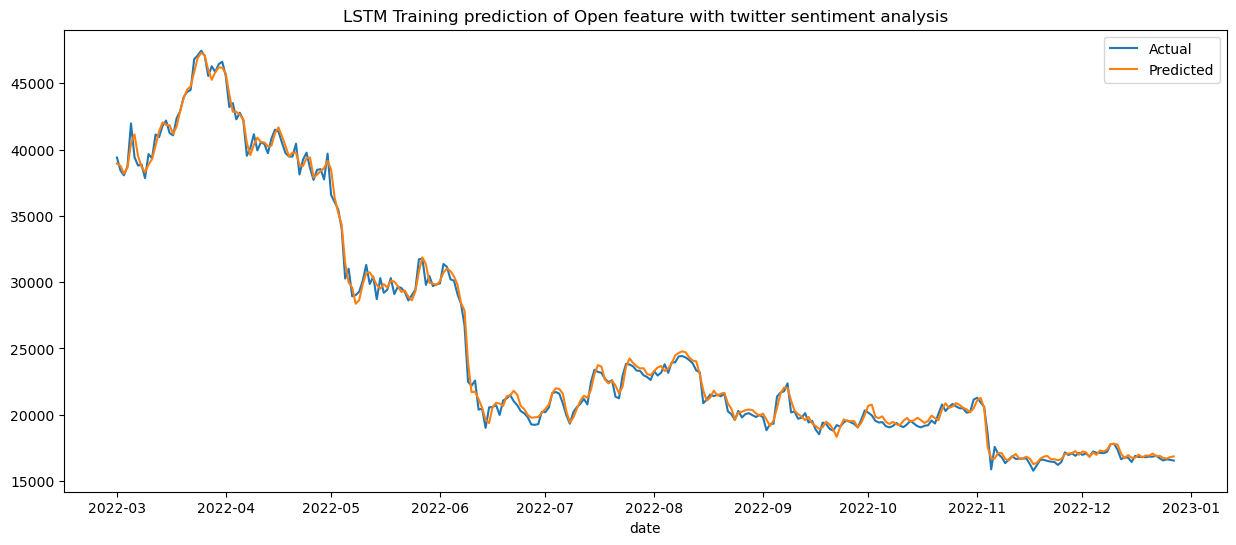

MAE for Open : 371.9659755277318


MAPE for Open : 0.015081192857911535




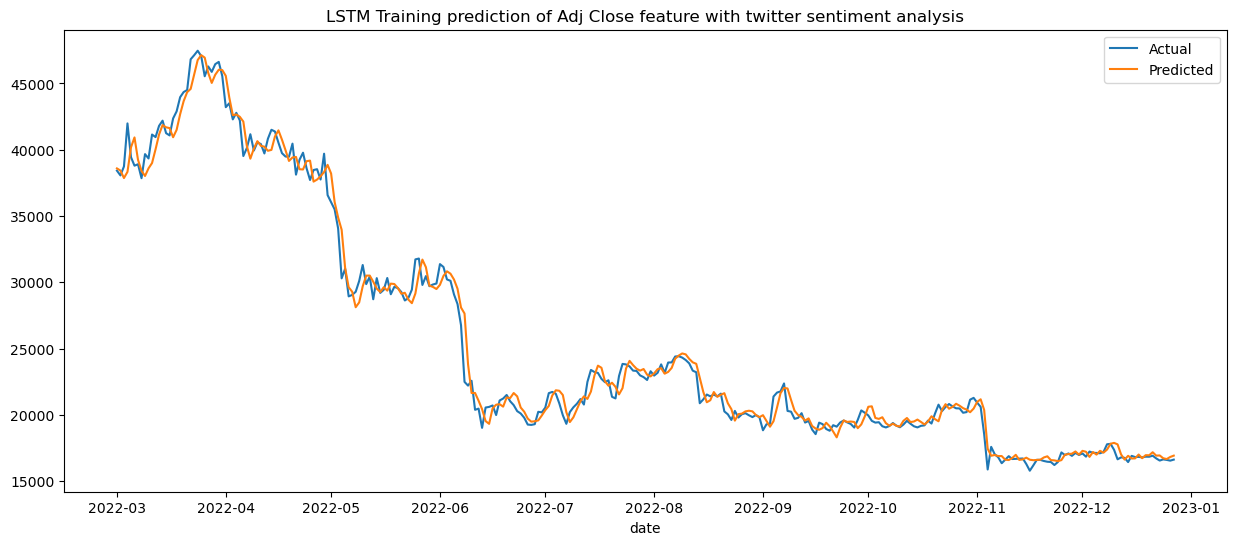

MAE for Adj Close : 623.406670374586


MAPE for Adj Close : 0.024333827212525635




In [43]:
prediction_plot('Training', training_dates, y_train_actual, y_train_pred)

In [44]:
validation_dates= training_df.index[X_train.shape[0]:X_train.shape[0] + X_val.shape[0]]



validation_prediction = cnn_lstm_model.predict(X_val)
validation_prediction=validation_prediction.reshape(validation_prediction.shape[0], validation_prediction.shape[2])
y_val_pred = inference_scaler.inverse_transform(validation_prediction)

y_val_reshaped = y_val.reshape(y_val.shape[0], y_val.shape[2])

y_val_actual = inference_scaler.inverse_transform(y_val_reshaped)

2/2 [==============================] - 0s 4ms/step


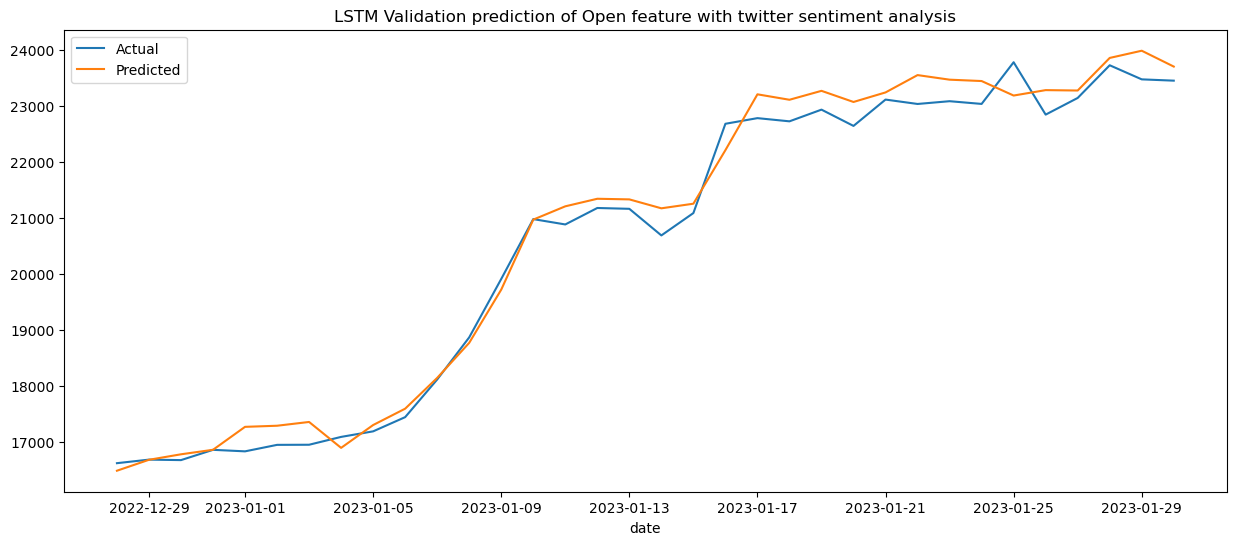

MAE for Open : 266.13792509191177


MAPE for Open : 0.012653972731847712




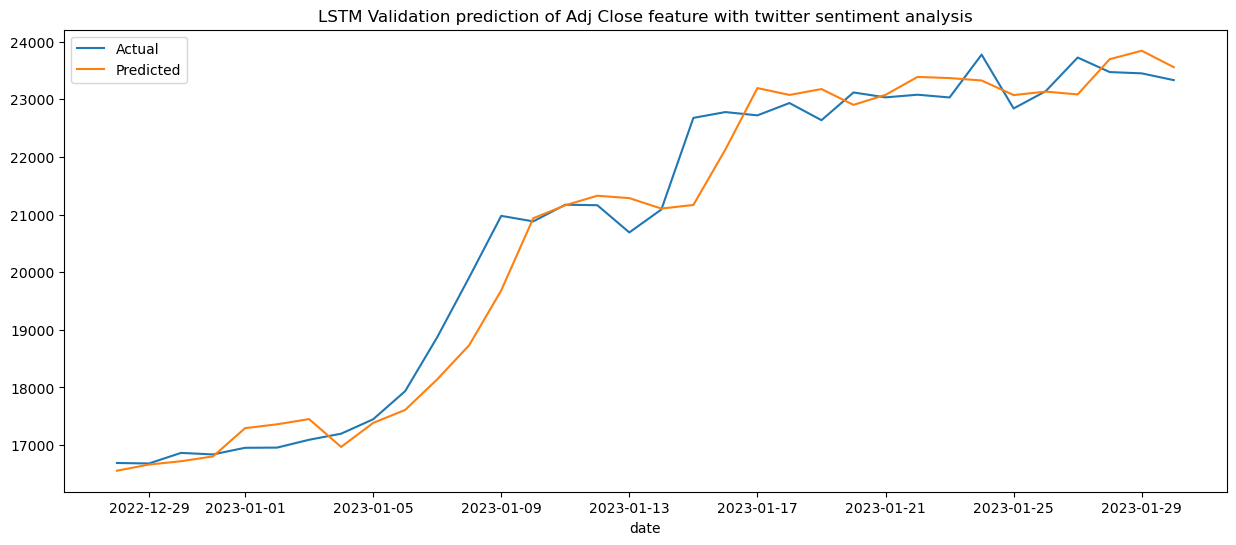

MAE for Adj Close : 367.1493566176471


MAPE for Adj Close : 0.017563234309161235




In [45]:
prediction_plot('Validation', validation_dates,y_val_actual,y_val_pred)

In [46]:
testing_dates= training_df.index[-X_test.shape[0]:]


testing_prediction = cnn_lstm_model.predict(X_test)
testing_prediction=testing_prediction.reshape(testing_prediction.shape[0], testing_prediction.shape[2])
y_test_pred = inference_scaler.inverse_transform(testing_prediction)

y_test_reshaped = y_test.reshape(y_test.shape[0], y_test.shape[2])

y_test_actual = inference_scaler.inverse_transform(y_test_reshaped)

3/3 [==============================] - 0s 11ms/step


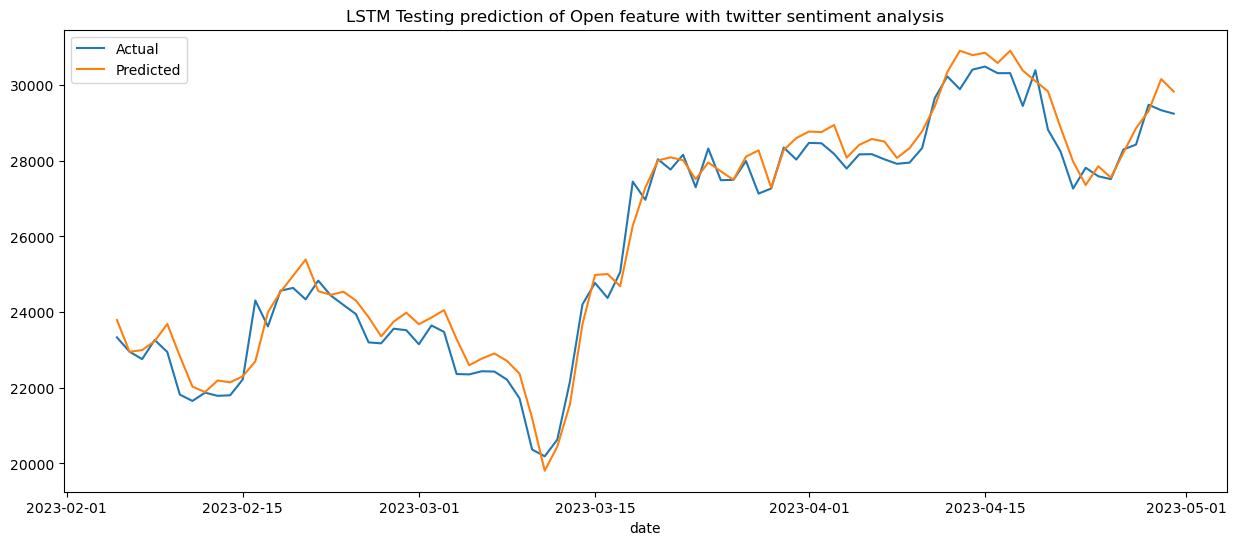

MAE for Open : 419.40992647058823


MAPE for Open : 0.01650257977053738




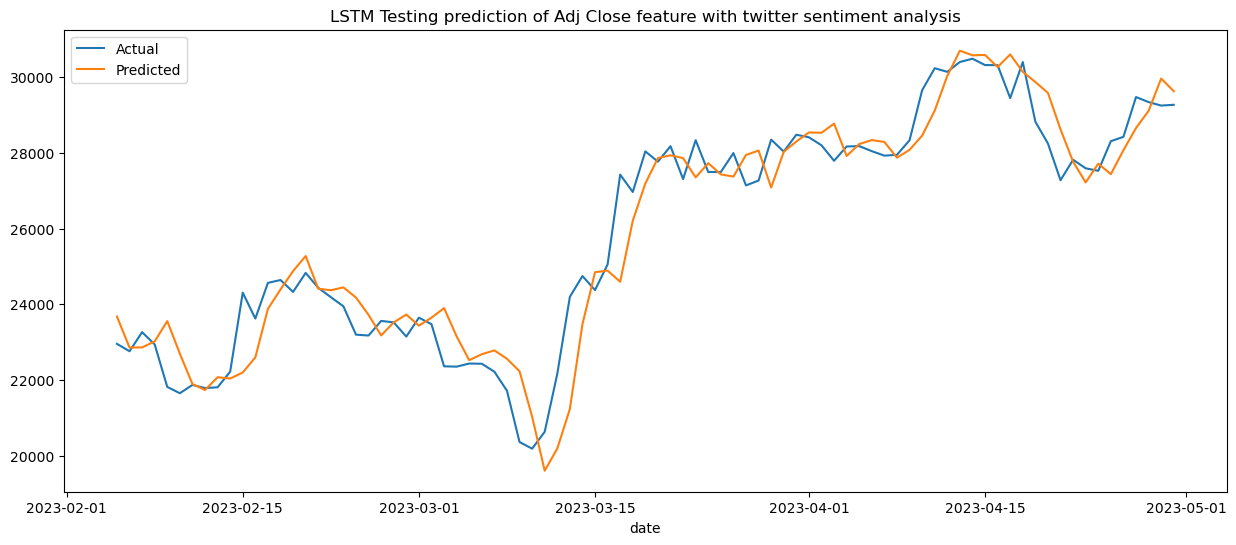

MAE for Adj Close : 625.2830882352941


MAPE for Adj Close : 0.024906966653050984




In [47]:
prediction_plot('Testing',testing_dates,y_test_actual,y_test_pred)

From the MAE and MAPE scores and prediction plots for different models, it is seen that CNN-LSTM based model performed the best followed by Random Forest regression model. 